## Name:-HIRALAL

## K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing The Data set

In [2]:
dataset=pd.read_csv('Iris.csv')

In [3]:
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
Id,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
SepalLengthCm,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
SepalWidthCm,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
PetalLengthCm,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
PetalWidthCm,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


In [4]:
#Extracting Input Data from the dataset

X=dataset.iloc[:,:-1]

In [5]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [6]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Scaling our data set so that each feature is roughly the same size.

In [62]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X)

StandardScaler()

In [10]:
X_transformed=scalar.fit_transform(X)

In [11]:
X_transformed

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

## Performing Principal component analysis on data set so that we can visualize it in 2D space

## With 2 maximum components

In [63]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=42)

In [13]:
pca.fit(X)

PCA(n_components=2, random_state=42)

In [14]:
X=pca.transform(X)

In [15]:
X.shape

(150, 2)

In [16]:
X[:10]

array([[ 7.45475269e+01,  4.41425501e-01],
       [ 7.35491434e+01,  3.09342060e-01],
       [ 7.25571205e+01,  8.45275987e-02],
       [ 7.15517906e+01,  1.60353347e-01],
       [ 7.05527631e+01,  2.27636455e-01],
       [ 6.95354479e+01,  6.82532551e-01],
       [ 6.85575899e+01, -2.06900363e-02],
       [ 6.75509913e+01,  1.90728535e-01],
       [ 6.65616547e+01, -2.21321702e-01],
       [ 6.55544836e+01,  3.65310173e-02]])

## Using The elbow method to find the optimal number of clusters

In [17]:
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\hira\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## inertia=Sum of Square from the centriod to its belonging points

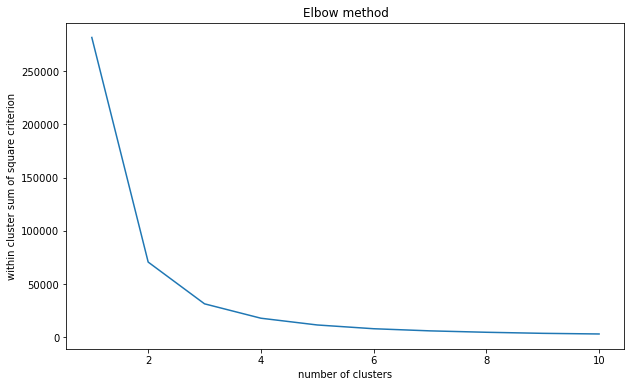

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),inertia)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of square criterion')
plt.show()


#### From the above graph it is clear that the number of clusters should be maximum 3 for optimum performance

## Training the model on the dataset

In [64]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(X)

In [65]:
X[y_pred==1,0]

array([74.54752687, 73.54914342, 72.55712047, 71.55179061, 70.55276306,
       69.53544789, 68.55758992, 67.5509913 , 66.56165465, 65.55448363,
       64.54932356, 63.5536129 , 62.56164171, 61.5800901 , 60.55927531,
       59.54918571, 58.55933542, 57.56071049, 56.54382326, 55.56005373,
       54.54965045, 53.55981416, 52.58819273, 51.55121717, 50.55415146,
       49.56145267, 48.56074836, 47.56602511, 46.57008055, 45.56981711,
       44.56892308, 43.56321112, 42.57432713, 41.57349887, 40.57619447,
       39.58526514, 38.57691106, 37.57879977, 36.59168804, 35.5774154 ,
       34.58563393, 33.58857102, 32.59595514, 31.57274893, 30.56585006,
       29.58714054, 28.58149749, 27.59398207, 26.58368981, 25.59065252])

In [66]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

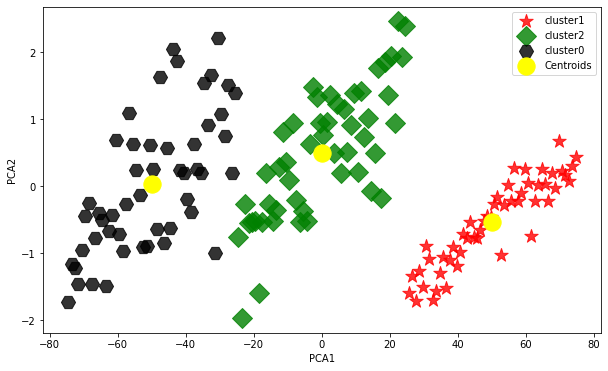

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=200,marker='*',c='red',alpha=0.8,label='cluster1')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=200,marker='D',c='green',alpha=0.8,label='cluster2')
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=200,marker='H',c='black',alpha=0.8,label='cluster0')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc='upper right')

plt.show()